In [1]:
import argparse
from pathlib import Path
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from termcolor import colored
from sklearn.model_selection import train_test_split

# Initialization:
At firts, we:
 - load our dataset
 - delete rows with a NaN value inside 'heartRate','cigsPerDay','BMI','glucose','BPMeds','totChol'
 - substitute NaN values inside 'education' with 0

In [2]:
df = pd.read_csv('C:/Users/Flavia/Downloads/framingham.csv', header='infer',encoding='utf-8')

In [3]:
#delete rows with a NoNe value that is in 'heartRate','cigsPerDay','BMI','glucose','BPMeds','totChol'
columns_null=['heartRate','cigsPerDay','BMI','glucose','BPMeds','totChol']
for column in columns_null:
    df.drop(df[df[column].isna()==True].index, inplace=True)
    
    
#in 'education', substitute NaN values with 0
df['education'] = df['education'].fillna(0)

# Show our dataset

In [4]:
df.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


### Description of the attributes

#### Demographic:
- Male:
 - 1 if male 
 - 0 if female


- Age: age of the patient in range (32,70)

#### Behavioral
- Education:
 - 0 if unknown
 - 1 = Some High School
 - 2 = High School or GED
 - 3 = Some College or Vocational School
 - 4 = college and further
 
 
- Current Smoker: 
  - 1 if the patient is a current smoker 
  - 0 if the patient is NOT a current smoker 
  

- Cigs Per Day: the number of cigarettes that the person smoked on average in one day

#### Medical (history)
- BP Meds: 
  - 1 if the patient is on blood pressure medication
  - 0 if the patient is NOT on blood pressure medication
  
  
- Prevalent Stroke: 
  - 1 if the patient had a stroke previously
  - 0 if the patient had NOT a stroke previously
  
  
- Prevalent Hyp:
  - 1 if the patient is hypertensive 
  - 0 if the patient is NOT hypertensive
  
  
- Diabetes: 
  - 1 if the patient has diabetes 
  - 0 if the patient has NOT diabetes 
  
  
#### Medical(current)
- Tot Chol: total cholesterol level


- Sys BP: systolic blood pressure 


- Dia BP: diastolic blood pressure


- BMI: Body Mass Index


- Heart Rate: heart rate


- Glucose: glucose level 


#### Predict variable (desired target)
- TenYearCHD: 10 year risk of coronary heart disease CHD
  - 1 if “Yes”
  - 0 if “No”

# Data Exploration

Actually we can quite demostrate that , for some of the variables, our dataset is enough balanced... but for other variables the dataset is NOT balanced


#### 1<sup>st</sup> example: SMOKERS vs NON-smokers

For example, we will notice that **current smokers** (and therefore also **current non-smokers**) cover almost half of the sample:

In [72]:
countNoSmoker = len(df[df.currentSmoker == 0])
countSmoker = len(df[df.currentSmoker == 1])
print(colored("Percentage of Current NON-Smoker Patients: {:.2f}%".format((countNoSmoker / (len(df.currentSmoker))*100)),'green',attrs=['bold']))
print(colored("Percentage of Current Smoker Patients: {:.2f}%".format((countSmoker / (len(df.currentSmoker))*100)),'green',attrs=['bold']))

Percentage of Current NON-Smoker Patients: 51.16%
Percentage of Current Smoker Patients: 48.84%


#### 2<sup>nd</sup> example: patients WITH diabetes vs withOUT diabetes


*But sometime it doesn't happen!*

*For example, the percentage of patients with and without ***diabetes*** is not bilanced:*

In [70]:
diabetes0 = len(df[df.diabetes == 0])
diabetes1 = len(df[df.diabetes == 1])
print(colored("Percentage Patients WITH Diabetes: {:.2f}%".format((diabetes1 / (len(df.diabetes))*100)),'green',attrs=['bold']))
print(colored("Percentage Patients withOUT Diabetes: {:.2f}%".format((diabetes0 / (len(df.diabetes))*100)),'green',attrs=['bold']))

Percentage Patients WITH Diabetes: 2.72%
Percentage Patients withOUT Diabetes: 97.28%




*In fact, as for the diabetes, we can note as well an imbalance about ***the prediction of the risk of coronary heart disease CHD within 10 years***:*



#### 3<sup>rd</sup> example: patients WITH or withOUT risk of coronary heart disease CHD within 10 years 

In [64]:
target0 = len(df[df.TenYearCHD == 0])
target1 = len(df[df.TenYearCHD == 1])
print(colored("Percentage of Patients withOUT risk of coronary heart disease CHD within 10 years: {:.2f}%".format((target0 / (len(df.TenYearCHD))*100)),'green',attrs=['bold']))
print(colored("Percentage of Patients WITH risk of coronary heart disease CHD within 10 years: {:.2f}%".format((target1 / (len(df.TenYearCHD))*100)),'green',attrs=['bold']))

Percentage of Patients withOUT risk of coronary heart disease CHD within 10 years: 84.74%
Percentage of Patients WITH risk of coronary heart disease CHD within 10 years: 15.26%


#### 4<sup>th</sup> example: frequency of a previous Stroke differentiated for Sex

Now let's see another example to show the balancing of the dataset, seeing the ***frequency of a previous Stroke differentiated for Sex***  

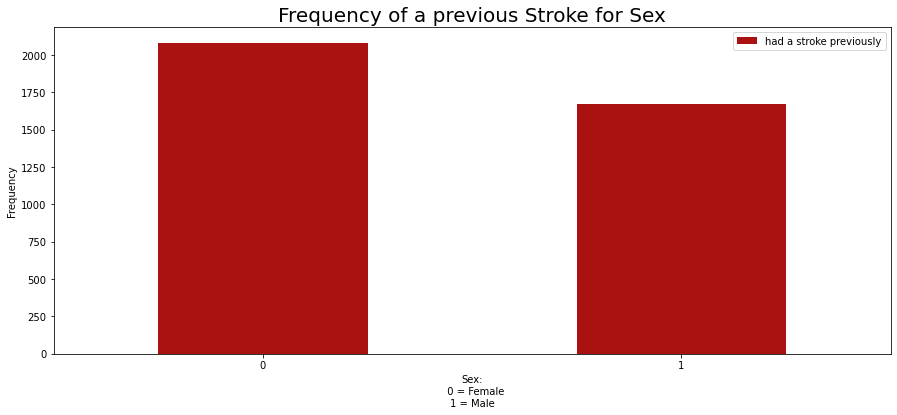

In [73]:
pd.crosstab(df.male,df.prevalentStroke=='1').plot(kind="bar",figsize=(15,6),color=['#AA1111'])
plt.title('Frequency of a previous Stroke for Sex',fontsize=20)
plt.xlabel('Sex:\n  0 = Female\n1 = Male')
plt.xticks(rotation=0)
plt.legend(["had a stroke previously"])
plt.ylabel('Frequency')
plt.show()

# Modify and work on the dataset 

One of the choices we took to develop this project, is to divide our dataset into 2 parts:
  -  a **training** dataset ('train_set.csv')
  - a **test** dataset ('test_set.csv')

So at first we must normalize each value of those columns which values are in a too large range (we need that all the values are in the range **(0,1)**):

In [18]:
columns_to_normalize=['age','cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']
for column in columns_to_normalize:
    df[column]=MinMaxScaler(copy=False).fit_transform(df[[column]])

In [19]:
df.head(8)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,0.184211,1.00,0.0,0.000000,0.0,0.0,0.0,0.0,0.140652,0.106383,0.232804,0.277024,0.363636,0.104520,0.0
1,0.0,0.368421,0.50,0.0,0.000000,0.0,0.0,0.0,0.0,0.234991,0.177305,0.349206,0.319680,0.515152,0.101695,0.0
2,1.0,0.421053,0.25,1.0,0.285714,0.0,0.0,0.0,0.0,0.226415,0.208038,0.338624,0.237518,0.313131,0.084746,0.0
3,0.0,0.763158,0.75,1.0,0.428571,0.0,0.0,1.0,0.0,0.192110,0.314421,0.497354,0.316045,0.212121,0.177966,1.0
4,0.0,0.368421,0.75,1.0,0.328571,0.0,0.0,0.0,0.0,0.295026,0.219858,0.380952,0.183228,0.414141,0.127119,0.0
5,0.0,0.289474,0.50,0.0,0.000000,0.0,0.0,1.0,0.0,0.197256,0.456265,0.656085,0.357731,0.333333,0.166667,0.0
6,0.0,0.815789,0.25,0.0,0.000000,0.0,0.0,0.0,0.0,0.157804,0.257683,0.243386,0.425836,0.161616,0.127119,1.0
7,0.0,0.342105,0.50,1.0,0.285714,0.0,0.0,0.0,0.0,0.343053,0.078014,0.243386,0.148812,0.353535,0.107345,0.0


Then, we create the ***training*** dataset and the ***test*** dataset using '***train_test_split***', a function in Sklearn model selection for splitting data arrays into two subsets: for training data and for testing data.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(dataset[args.features], dataset[args.label], test_size=0.2)
pd.concat([x_train, y_train], axis=1, copy=False).to_csv(Path(args.output, 'train_set.csv'),index=False, encoding='utf-8')
pd.concat([x_test, y_test], axis=1, copy=False).to_csv(Path(args.output, 'test_set.csv'),index=False, encoding='utf-8')

#### TRAINING dataset

In [16]:
df_train = pd.read_csv('C:/Users/Flavia/Desktop/train_set.csv', header='infer',encoding='utf-8')
df_train.head(7)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,0.500000,2.0,1,0.085714,0.0,0,0,0,0.132075,0.226950,0.433862,0.196801,0.484848,0.169492,0
1,1,0.736842,2.0,0,0.000000,0.0,0,1,0,0.171527,0.269504,0.370370,0.316287,0.363636,0.081921,0
2,1,0.631579,1.0,1,0.857143,0.0,0,0,0,0.228130,0.196217,0.328042,0.341735,0.262626,0.127119,0
3,1,0.578947,2.0,0,0.000000,0.0,0,0,0,0.379074,0.236407,0.338624,0.190499,0.414141,0.104520,0
4,1,0.552632,2.0,0,0.000000,0.0,0,0,0,0.137221,0.276596,0.433862,0.339796,0.262626,0.107345,0
5,0,0.289474,4.0,1,0.285714,0.0,0,0,0,0.260720,0.111111,0.211640,0.134270,0.464646,0.155367,0
6,0,0.315789,1.0,0,0.000000,0.0,0,0,0,0.152659,0.338061,0.391534,0.206011,0.393939,0.079096,0


#### TEST dataset

In [17]:
df_test = pd.read_csv('C:/Users/Flavia/Desktop/test_set.csv', header='infer',encoding='utf-8')
df_test.head(7)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,0.421053,1.0,0,0.000000,0.0,0,0,0,0.284734,0.212766,0.269841,0.289627,0.282828,0.104520,0
1,0,0.289474,2.0,0,0.000000,0.0,0,0,0,0.204117,0.257683,0.423280,0.169413,0.262626,0.158192,0
2,1,0.368421,3.0,0,0.000000,0.0,0,0,0,0.315609,0.234043,0.465608,0.253030,0.252525,0.067797,0
3,1,0.289474,4.0,0,0.000000,0.0,0,1,0,0.252144,0.215130,0.444444,0.236306,0.262626,0.062147,0
4,1,0.447368,2.0,1,0.128571,0.0,0,0,0,0.137221,0.148936,0.328042,0.153175,0.040404,0.135593,0
5,1,0.157895,2.0,0,0.000000,0.0,0,0,0,0.072041,0.226950,0.312169,0.252060,0.303030,0.124294,0
6,1,0.473684,1.0,1,0.285714,0.0,0,0,0,0.370497,0.200946,0.380952,0.143238,0.212121,0.070621,0
